# How to import VMAP meshes
This notebook demonstrates how to import finite element meshes in VMAP format in pylife, e.g., to be used for a FKM nonlinear assessment.

In [1]:
# standard modules
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import timeit

# pylife
import pylife
import pylife.vmap
import pylife.mesh
import pylife.stress.equistress
import pylife.mesh.gradient

In [2]:
# import the vmap file
filename = 'data/kt1.vmap'
vmap_mesh = pylife.vmap.VMAPImport(filename)

# select the geometry and state in the vmap file
geometry = 'KT1-1'
state = 'Step-1'
pylife_mesh = (vmap_mesh.make_mesh(geometry, state) 
               .join_coordinates()
               .join_variable('STRESS_CAUCHY')
               .to_frame())

# calculate the Mises equistress
pylife_mesh['mises'] = pylife_mesh.equistress.mises()

In [3]:
pylife_mesh

x         y         z         S11        S22  \
element_id node_id                                                        
1          68      -0.058024  0.005909  0.001042  107.280235  15.659771   
           95      -0.058024  0.004247  0.000926  107.280235  15.659771   
           96      -0.058024  0.003611  0.002350  107.280235  15.659771   
           58      -0.058024  0.005196  0.003000  107.280235  15.659771   
           14      -0.060000  0.005909  0.001042  107.280235  15.659771   
...                      ...       ...       ...         ...        ...   
2684       3315     0.060000 -0.000494  0.002577  100.007462   0.000952   
           3290     0.058024 -0.001621  0.002328  100.007462   0.000952   
           3287     0.058024 -0.002545  0.003241  100.007462   0.000952   
           3288     0.058024 -0.001180  0.003989  100.007462   0.000952   
           3261     0.058024 -0.000494  0.002577  100.007462   0.000952   

                          S33        S12       S13       S23       mises  
element_id node_id                                                        
1          68       23.321180 -13.440862 -5.005887 -3.322926   91.658809  
           95       23.321180 -13.440862 -5.005887 -3.322926   91.658809  
           96       23.321180 -13.440862 -5.005887 -3.322926   91.658809  
           58       23.321180 -13.440862 -5.005887 -3.322926   91.658809  
           14       23.321180 -13.440862 -5.005887 -3.322926   91.658809  
...                       ...        ...       ...       ...         ...  
2684       3315      0.000791   0.000580 -0.000230 -0.000831  100.006590  
           3290      0.000791   0.000580 -0.000230 -0.000831  100.006590  
           3287      0.000791   0.000580 -0.000230 -0.000831  100.006590  
           3288      0.000791   0.000580 -0.000230 -0.000831  100.006590  
           3261      0.000791   0.000580 -0.000230 -0.000831  100.006590  

[21472 rows x 10 columns]

We can filter only element Id 1:

In [4]:
# entries of element 1
pylife_mesh[pylife_mesh.index.get_level_values("element_id") == 1]

x         y         z         S11        S22  \
element_id node_id                                                        
1          68      -0.058024  0.005909  0.001042  107.280235  15.659771   
           95      -0.058024  0.004247  0.000926  107.280235  15.659771   
           96      -0.058024  0.003611  0.002350  107.280235  15.659771   
           58      -0.058024  0.005196  0.003000  107.280235  15.659771   
           14      -0.060000  0.005909  0.001042  107.280235  15.659771   
           41      -0.060000  0.004247  0.000926  107.280235  15.659771   
           42      -0.060000  0.003611  0.002350  107.280235  15.659771   
           4       -0.060000  0.005196  0.003000  107.280235  15.659771   

                         S33        S12       S13       S23      mises  
element_id node_id                                                      
1          68       23.32118 -13.440862 -5.005887 -3.322926  91.658809  
           95       23.32118 -13.440862 -5.005887 -3.322926  91.658809  
           96       23.32118 -13.440862 -5.005887 -3.322926  91.658809  
           58       23.32118 -13.440862 -5.005887 -3.322926  91.658809  
           14       23.32118 -13.440862 -5.005887 -3.322926  91.658809  
           41       23.32118 -13.440862 -5.005887 -3.322926  91.658809  
           42       23.32118 -13.440862 -5.005887 -3.322926  91.658809  
           4        23.32118 -13.440862 -5.005887 -3.322926  91.658809

In [5]:
# Calculate the stress gradient
tstart = timeit.default_timer()
grad = pylife_mesh.gradient_3D.gradient_of('mises')
tend = timeit.default_timer()
print(f"duration calculate stress gradient: {tend-tstart:.1f} s")

grad["abs_grad"] = np.linalg.norm(grad, axis=1)
pylife_mesh = pylife_mesh.join(grad, sort=False)

d:\pylife\src\pylife\mesh\gradient.py:384: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_grad = df.groupby("element_id").apply(self._compute_gradient)


duration calculate stress gradient: 18.6 s


In [6]:
display(grad)

,dmises_dx,dmises_dy,dmises_dz,abs_grad
node_id,,,,
68,0.000000e+00,3.796075e-12,-6.432715e-12,7.469271e-12
95,0.000000e+00,7.655099e-12,4.389822e-13,7.667675e-12
96,-7.275958e-12,1.017575e-11,-9.370560e-13,1.254446e-11
58,0.000000e+00,5.083878e-12,3.156447e-12,5.984060e-12
14,0.000000e+00,-9.094947e-13,0.000000e+00,9.094947e-13
...,...,...,...,...
3303,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3313,0.000000e+00,1.455192e-11,-2.910383e-11,3.253907e-11
3348,0.000000e+00,0.000000e+00,-7.275958e-12,7.275958e-12


Next, we visualize the absolute stress gradient G using the `pyvista` package.

C:\Users\mbe7rng\AppData\Local\Temp\ipykernel_11448\788003117.py:3: UserWarning: VTK 9 no longer accepts an offset array
  grid = pv.UnstructuredGrid(*pylife_mesh.mesh.vtk_data())
C:\Users\mbe7rng\AppData\Roaming\Python\Python39\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


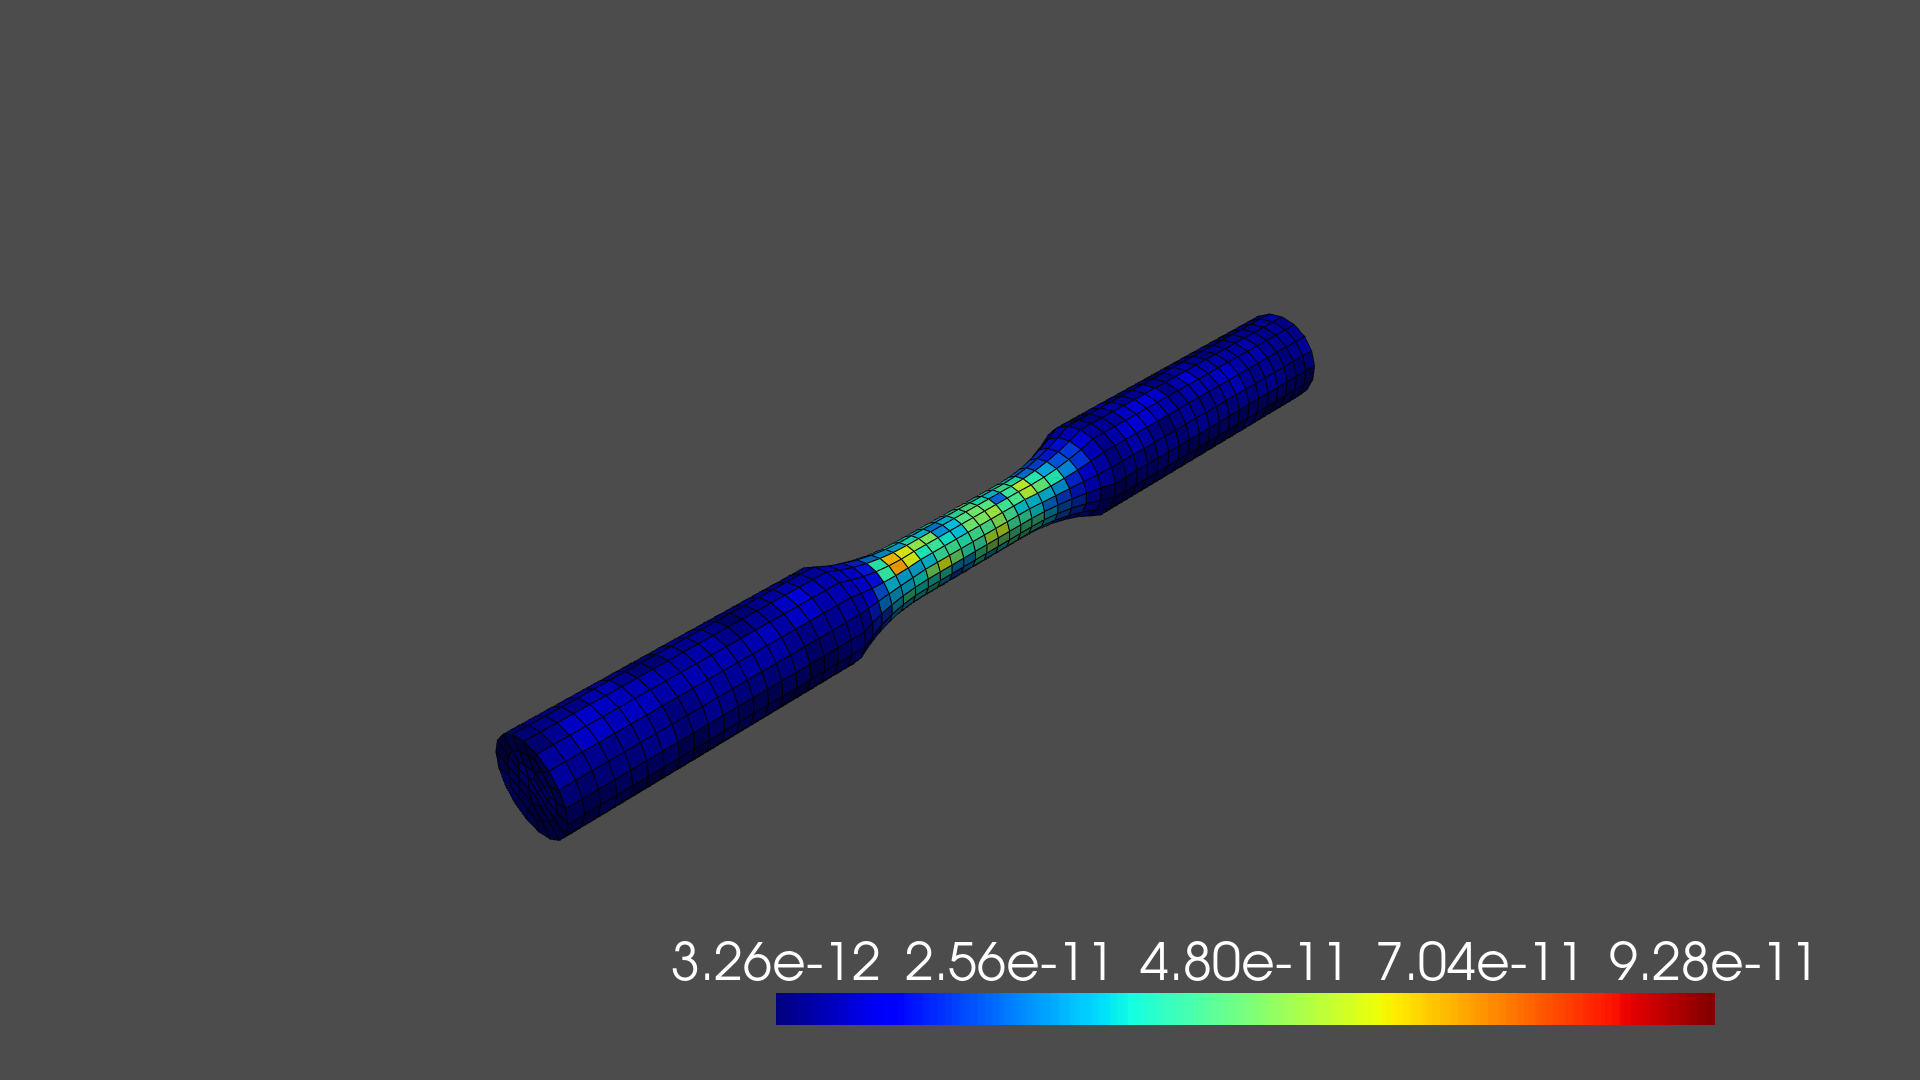

In [7]:
### Plotting using pyvista
import pyvista as pv
grid = pv.UnstructuredGrid(*pylife_mesh.mesh.vtk_data())
plotter = pv.Plotter(window_size=[1920, 1080])
plotter.add_mesh(grid, scalars=pylife_mesh.groupby('element_id')['abs_grad'].mean().to_numpy(),
                show_edges=True, cmap='jet')
plotter.add_scalar_bar()
plotter.show()